# Kaggle Competition: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## We'll use [tabular model](https://docs.fast.ai/tabular.html) from fastai v1 library running on top of PyTorch to do data preprocessing, feature generation and a two-layer fully connected neural network to generate predictions in a semi-automated way

In [1]:
from fastai.tabular import *

## Import tabular data into a Pandas `DataFrame`.

In [2]:
path = Path('../input')
train_df = pd.read_csv(path/'train.csv')

In [3]:
train_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
n = len(train_df); n

1460

In [5]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(train_df.columns) 

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

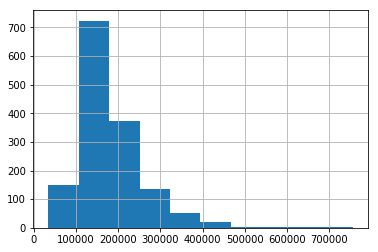

In [7]:
train_df['SalePrice'].hist()

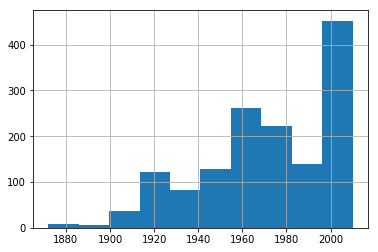

In [8]:
train_df['YearBuilt'].hist()

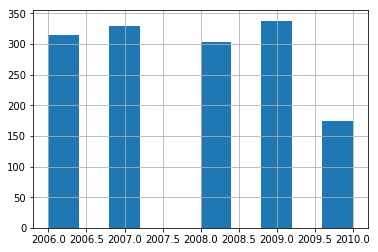

In [9]:
train_df['YrSold'].hist()

In [10]:
test_df = pd.read_csv(path/'test.csv')

In [11]:
n = len(test_df); n

1459

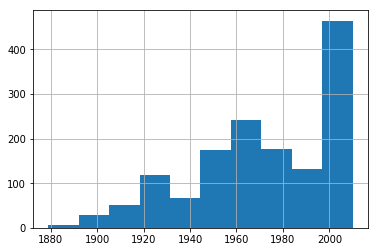

In [12]:
test_df['YearBuilt'].hist()

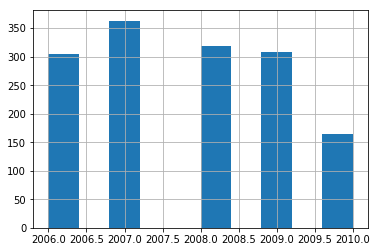

In [13]:
test_df['YrSold'].hist()

Data in the train and test data sets appears to be fairly balanced.

## Define categorical and continuous variables as well as a dependent variable

In [14]:
dep_var = 'SalePrice'
cat_names = ['MSSubClass', 'MSZoning', 'Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
            'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle',
            'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
            'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath',
            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional',
            'Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
            'PoolQC','Fence','MiscFeature','MoSold','SaleType','SaleCondition'
]

cont_names = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF',
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold'
]
procs = [ Categorify, Normalize] #FillMissing,

Since some of the features of test_df have missing values, which are not present in train_df, we have to combine the two data sets and do preprocessing step filling missing values before we submit the training data to the fastai model.

In [15]:
concat_df=pd.concat([train_df.drop(columns='SalePrice'),test_df])

In [16]:
n = len(concat_df); n

2919

In [17]:
tfm = FillMissing(cat_names, cont_names) # fastai function
tfm(concat_df)

In [18]:
train_df_mod=concat_df.iloc[:1460].copy()
train_df_mod['SalePrice']=train_df['SalePrice']

In [19]:
train_df_mod.shape

(1460, 89)

In [20]:
test_df_mod=concat_df.iloc[1460:].copy()
test_df_mod.shape

(1459, 88)

In [21]:
# select random indicies for validation data set
idx = np.random.permutation(range(train_df_mod.shape[0]))[:150]
idx.sort()

In [22]:
# since evaluation metric in the competition is rmse of the log of sales price, we'll take a log of the data 
train_df_mod.SalePrice = np.log(train_df_mod.SalePrice)

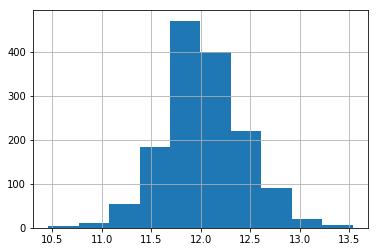

In [23]:
train_df_mod.SalePrice.hist()

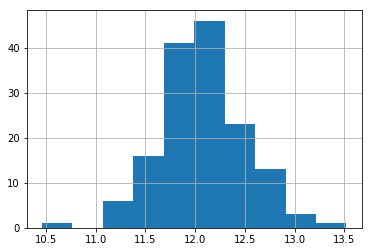

In [24]:
train_df_mod.SalePrice[idx].hist()

## Create data bunch from Tabular data

In [206]:
# Use .split_by_idx(idx) during initial training set to look at the validation results and then retrain with .split_none()
data = (TabularList.from_df(train_df_mod, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                .split_none() # .split_by_idx(idx) #
                .label_from_df(cols=dep_var, label_cls=FloatList)
                .add_test(TabularList.from_df(test_df_mod, path=path, cat_names=cat_names, cont_names=cont_names))
                .databunch())

In [207]:
data.show_batch(rows=10)

MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,GarageYrBlt_na,GarageArea_na,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,target
50,RH,Pave,Pave,IR2,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,Stucco,None,TA,TA,BrkTil,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,0.0,0.0,1,0,3,1,TA,6,Typ,0,#na#,Detchd,Unf,1.0,TA,TA,Y,#na#,#na#,#na#,7,WD,Abnorml,False,False,False,False,False,False,False,False,-0.6664,-0.6028,-1.3001,0.7331,-0.5706,-0.5736,-0.2886,0.0990,-0.6027,-0.8139,0.7445,-0.1202,0.0086,-0.4390,-0.8979,-0.7519,-0.7042,0.5570,-0.1163,-0.2701,-0.0687,-0.0877,0.8917,11.979385
60,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,Mansard,CompShg,HdBoard,AsphShn,BrkFace,Gd,TA,CBlock,TA,TA,No,ALQ,Rec,GasA,Gd,Y,SBrkr,0.0,1.0,1,2,3,1,TA,7,Typ,1,Gd,Attchd,Unf,2.0,TA,TA,Y,#na#,#na#,#na#,6,WD,Normal,False,False,False,False,False,False,False,False,0.9218,0.1185,-0.1082,-0.8169,1.4490,-0.1308,0.7963,-0.9601,-0.8102,-0.3146,0.8133,-0.1202,0.4330,-0.4390,0.3088,1.0352,-0.7042,-0.3592,-0.1163,-0.2701,-0.0687,-0.0877,-0.6142,12.072541
20,RL,Pave,#na#,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,Hip,WdShake,Stone,HdBoard,None,Gd,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,TA,Y,SBrkr,1.0,0.0,2,0,2,1,Gd,10,Typ,1,Gd,Attchd,Fin,2.0,TA,TA,Y,#na#,#na#,#na#,5,COD,Abnorml,True,False,False,False,False,False,False,False,-0.0765,0.4991,0.1567,-0.4294,-0.5706,1.5816,2.1910,-1.2837,1.1570,4.4890,-0.7949,-0.1202,2.6310,-0.1056,0.8981,-0.7519,0.3825,2.4877,-0.1163,-0.2701,-0.0687,-0.0877,0.1387,12.567238
20,RM,Pave,#na#,IR1,HLS,AllPub,Inside,Gtl,OldTown,Feedr,RRNn,1Fam,1Story,5,7,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,LwQ,Rec,GasA,TA,Y,SBrkr,1.0,0.0,1,0,2,1,TA,4,Typ,0,#na#,Detchd,RFn,2.0,TA,TA,Y,#na#,MnPrv,#na#,6,WD,Normal,False,False,False,False,False,False,False,False,-0.9387,-0.2286,-0.5386,0.4909,-0.5706,-0.5780,3.7097,-1.2837,-0.5298,-0.8734,-0.7949,-0.1202,-1.3140,-0.6474,1.1554,0.3651,0.0504,-0.3592,-0.1163,-0.2701,-0.0687,-0.0877,0.1387,11.736069
75,RL,Pave,#na#,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,Gable,CompShg,Stucco,Stucco,None,Gd,Gd,PConc,TA,TA,No,GLQ,LwQ,GasA,Gd,Y,SBrkr,1.0,1.0,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,Unf,2.0,TA,TA,Y,Ex,GdPrv,#na#,3,WD,Abnorml,False,False,False,False,False,False,False,False,4.7334,1.4930,-1.7637,0.2487,-0.5706,1.2988,0.8520,-0.9669,0.6897,0.5106,2.3206,7.9418,3.0382,-2.5228,1.5061,-0.7519,-0.4628,8.6723,-0.1163,-0.2701,12.6748,-0.0877,-1.3672,12.367341
20,RL,Pave,#na#,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,None,TA,Gd,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0.0,0.0,1,1,3,1,TA,8,Min2,1,TA,Attchd,RFn,1.0,TA,TA,Y,#na#,#na#,#na#,3,WD,Normal,False,False,False,False,False,False,False,False,-1.3471,0.3162,-0.3069,-1.1075,-0.5706,-0.9727,-0.2886,1.2962,0.1882,1.3797,-0.7949,-0.1202,0.3436,-0.6890,-0.5799,-0.7519,-0.2515,-0.3592,-0.1163,-0.2701,-0.0687,-0.0877,-0.6142,11.876874
20,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,7,Hip,CompShg,CemntBd,CmentBd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1.0,0.0,2,0,3,1,Gd,7,Typ,2,TA,Attchd,Fin,2.0,TA,TA,

## Build and train the model

In [208]:
#define an upper limit for sales price to make model task simpler
max_log_y = np.max(train_df_mod['SalePrice'])*1.2
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [209]:
#build the model
learn = tabular_learner(data, layers=[200,100], ps=[0.001,0.04], emb_drop=0.04, #[1000,500] 0.04 ps=[0.001,0.001]
                         y_range=y_range,metrics=rmse) 

In [210]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(6, 4)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(5, 4)
    (5): Embedding(5, 4)
    (6): Embedding(3, 3)
    (7): Embedding(6, 4)
    (8): Embedding(4, 3)
    (9): Embedding(26, 10)
    (10): Embedding(10, 6)
    (11): Embedding(9, 5)
    (12): Embedding(6, 4)
    (13): Embedding(9, 5)
    (14): Embedding(11, 6)
    (15): Embedding(10, 6)
    (16): Embedding(7, 5)
    (17): Embedding(9, 5)
    (18): Embedding(16, 8)
    (19): Embedding(17, 8)
    (20): Embedding(5, 4)
    (21): Embedding(5, 4)
    (22): Embedding(6, 4)
    (23): Embedding(7, 5)
    (24): Embedding(5, 4)
    (25): Embedding(5, 4)
    (26): Embedding(5, 4)
    (27): Embedding(7, 5)
    (28): Embedding(7, 5)
    (29): Embedding(7, 5)
    (30): Embedding(6, 4)
    (31): Embedding(3, 3)
    (32): Embedding(6, 4)
    (33): Embedding(5, 4)
    (34): Embedding(4, 3)
    (35): Embedding(5, 4)
    (36): Embedding(4, 3)
  

In [211]:
# find starting learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


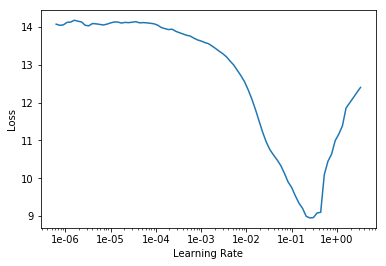

In [212]:
learn.recorder.plot()

In [213]:
# lr=5e-3 is a good place to start
learn.fit_one_cycle(30, 5e-2, wd=0.2)

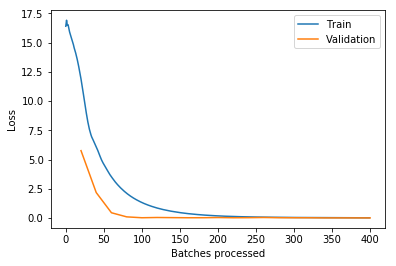

In [175]:
learn.recorder.plot_losses()

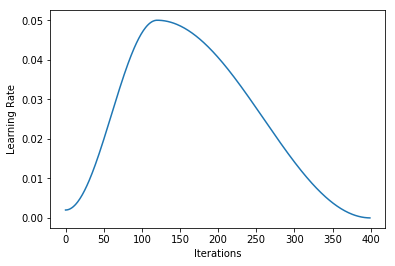

In [176]:
learn.recorder.plot_lr()

In [159]:
learn.fit_one_cycle(20, 5e-3, wd=0.2)

In [204]:
learn.fit(10, 0.1e-3)

## Now go back and rerun the model with .split_none() in DataBunch to train in on the full dataset

## Make predictions and generate output

In [214]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["SalePrice"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","SalePrice"]].to_csv("house_submission16.csv",index=False)